In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape


(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1215,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt 

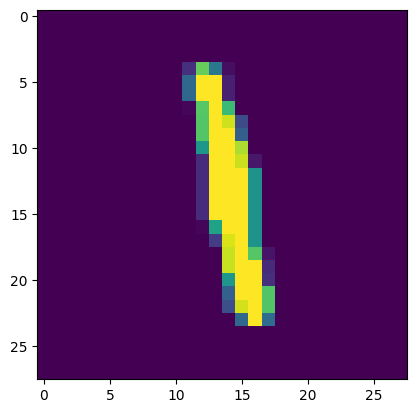

In [6]:
plt.imshow(df.iloc[41831,1:].values.reshape(28,28))

In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
x_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn= KNeighborsClassifier()

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
import time 
start= time.time()
y_pred = knn.predict(x_test)
print(time.time()- start)

10.00351071357727


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [17]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 100)

In [18]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [19]:
x_train_trf.shape

(33600, 100)

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(x_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.954047619047619

In [25]:
for i in range (1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    
    knn = KNeighborsClassifier()
    
    
    knn.fit(x_train_trf,y_train)
    
    y_pred = knn.predict(x_test_trf)
    
    print(accuracy_score(y_test,y_pred))

KeyboardInterrupt: 

In [26]:
#transforming to a 2Dcoordinate system 
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


In [27]:
x_train_trf

array([[-2.71851847, -0.48958687],
       [-0.67709129, -6.7532323 ],
       [-3.03328543,  6.50949571],
       ...,
       [ 2.14872909,  0.7806851 ],
       [ 1.05973269,  0.94777388],
       [17.70268367,  1.96226685]])

In [28]:

import plotly.express as px 
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color= y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()


In [32]:
#transforming in 3D
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [33]:
x_train_trf

array([[-2.71861657, -0.48967981,  1.13531561],
       [-0.67692525, -6.75289334, -2.33695511],
       [-3.03321903,  6.50964757,  7.49223679],
       ...,
       [ 2.14884264,  0.78099621, -0.74757099],
       [ 1.0595635 ,  0.9475563 ,  3.94980801],
       [17.70258672,  1.96190743, -4.94371821]])

In [34]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=x_train_trf[:,0],y=x_train_trf[:,-1],z=x_train_trf[:,2],
                    color=y_train_trf)
fig.update_layout(
        margin= dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [35]:
pca.explained_variance_
#Eigen values

array([40.67111198, 29.17023389, 26.74459602])

In [36]:
pca.components_
#Eigen vectors

array([[-5.15510023e-20, -7.97245951e-20,  1.70417167e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.17392663e-17,  2.03732100e-17,  2.29602302e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.53330974e-17, -1.46987695e-17, -2.85971449e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [39]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [38]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transorm(x_test)

AttributeError: 'PCA' object has no attribute 'transorm'